# Homework 5

Sample solutions to hw5, also illustrating the use of [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).


In [1]:
%matplotlib inline

In [2]:
from pylab import *
from scipy.optimize import fsolve

## Isothermal p-system

All of the problems below concern the same nonlinear hyperbolic system 
$q_t + f(q)_x=0$ given by the p-system arising from Lagrangian gas dynamics (2.108)
in the case of isothermal flow (as in Problem 2.8(b) from hw1):

$$
\begin{split}
v_t - u_x &= 0,\\
u_t + (a^2/v)_x &=0.
\end{split}
$$

Write out formulas for general values of $a$ but use $a=2$ for the specific examples.

The figure below shows a set of Hugoniot loci (in red and blue) and integral
curves of the eigenvectors (in green and magenta) through the set of points $(v_*,u_*)$ 
where $u_*=0$ and $v_* = 0.5,~1,~1.5,~\ldots,~10$ (marked with dots in the figure).

Note that these curves agree well near the points $(v_*,u_*)$ but are not
identical farther away.

You will be asked to produce a similar figure and this shows what you are aiming for.

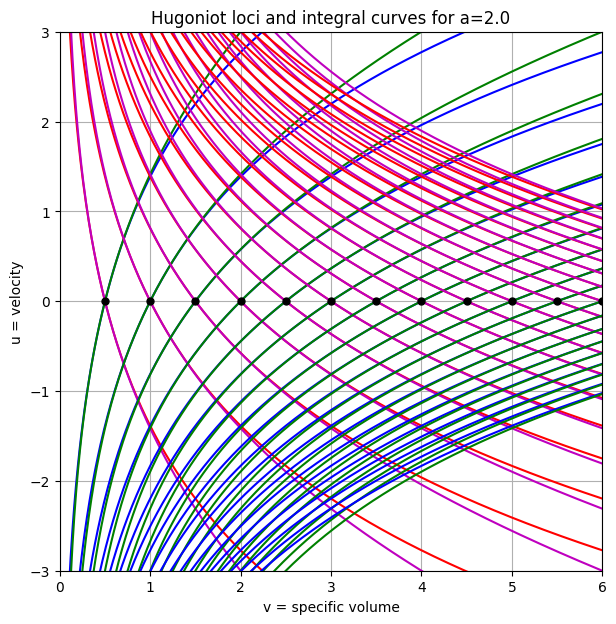

In [3]:
from IPython.display import Image
Image('isothermal1.png', width=500)

**Question 1.** 

Work out the flux Jacobian and its eigenvalues and eigenvectors.
Show that both characteristic families are genuinely nonlinear.

#### Solution:

$$
f(q) = \begin{bmatrix} -u \\ a^2/v \end{bmatrix}, \quad\quad 
f'(q) = \begin{bmatrix} 0 & -1 \\ -a^2/v^2 & 0 \end{bmatrix}
$$
The eigenvalues and eigenvectors are:
$$
\lambda^1 = -a/v, \quad r^1 = \begin{bmatrix} v\\a \end{bmatrix},
$$
and
$$
\lambda^2 = a/v, \quad r^2 = \begin{bmatrix} v\\-a \end{bmatrix},
$$

To check the fields are genuinely nonlinear, we calculate

$$
\nabla \lambda^1 = \begin{bmatrix} a/2v^2\\ 0 \end{bmatrix},
\quad \nabla \lambda^1 \cdot r^1 = \frac{a^2}{2v^2} > 0 ~~\text{for all}~v>0,
$$
and
$$
\nabla \lambda^2 = \begin{bmatrix} -a/2v^2\\ 0 \end{bmatrix},
\quad \nabla \lambda^2 \cdot r^2 = \frac{-a^2}{2v^2} < 0 ~~\text{for all}~v>0,
$$

Note that $\lambda^1$ increases with $v$, while $\lambda^2$ decreases as $v$ increases.

**Question 2.** 

Following Section 13.8.1, work out the equations for the integral
curves of the eigenvectors through an arbitrary point
$(v_*, u_*)$, e.g. specifying $u(v)$ as $v$ varies (with $u(v_*) = u_*$).
You may find it convenient to use this to define Python functions
`uint1(v,vstar,ustar,a)`, `uint2(v,vstar,ustar,a)`, so that you can easily plot these as
functions of $v$.

#### Solution:

Taking $\alpha(\xi)\equiv 1$, we obtain $\tilde q'(\xi) = r^p(\tilde q(\xi))$, or
\begin{align*}
\tilde v'(\xi) &= \tilde v(\xi)\\
\tilde u'(\xi) &= a
\end{align*}
with e.g. $v(0)=v_*,~u(0)=u_*$.
The solutions to these decoupled equations are:

$$
\tilde v(\xi) = v_* \exp(\xi), \quad
\tilde u(\xi) = u_* + a\xi.
$$

Combining these gives $\tilde u(\xi) = u_* \pm a\log(\tilde v(\xi)/v_*)$. Considering the fact that the integral curves should be tangent to the eigenvectors, the minus sign goes with $\lambda^2$.

In [4]:
uint1 = lambda v,vstar,ustar,a: ustar + a*log(v/vstar)
uint2 = lambda v,vstar,ustar,a: ustar - a*log(v/vstar)

**Question 3.** 

Determine similar equations for the Hugoniot loci through an
arbitrary point $(v_*, u_*)$, e.g. specifying $v(u)$ as $u$ varies
away from $u_*$.  You may find it convenient to use this to define Python functions
`uhug1(v,vstar,ustar)`, `uhug2(v,vstar,ustar)`, so that you can easily plot these as
functions of $v$.

Also give the formula for the shock speed $s(v)$
for any point $(v,u(v))$ along this curve and show that this can be written as

$$
s(v)= \pm \frac{a}{\sqrt{vv_*}}.
$$

(Note that, as expected, this converges
to the corresponding eigenvalue as $v \rightarrow v_*$.)

#### Solution:

The Rankine-Hugoniot conditions between $(v_*,u_*)$ and any other point on a Hugoniot locus give:

\begin{align*}
u_* - u &= s(v-v_*)\\
a^2/v - a^2/v_* &= s(u-u_*)
\end{align*}

Using the first equation, we can eliminate $u$ from the second equation to get:

$$
a^2/v - a^2/v_* = -s^2(v - v_*)
$$

and hence 

$$
s = \pm\sqrt{\frac{a^2/v_* - a^2/v}{v - v_*}}
  = \pm \frac{a}{\sqrt{vv_*}}.
$$

We also find from the first equation of the R-H conditions that

$$
u = u_* + s(v-v_*)
$$

with $s$ as given above.

In [5]:
uhug1 = lambda v,vstar,ustar,a: ustar + a*(v-vstar)/sqrt(v*vstar)
uhug2 = lambda v,vstar,ustar,a: ustar - a*(v-vstar)/sqrt(v*vstar)

s1 = lambda v,vstar,ustar,a: -a/sqrt(v*vstar)
s2 = lambda v,vstar,ustar,a:  a/sqrt(v*vstar)

**Question 4.** 

For the particular case $a=2$,
plot these curves to produce a plot similar to that shown above, and
indicate which curves correspond to which family and which are Hugoniot
loci or integral curves.  If you can't produce your own plot, at least
figure this out for the plot shown above, as best you can, and specify what
each color curve corresponds to.

#### Solution:

The legend in the figure below tells what each curve is.

In [6]:
def plot_phase_plane():
    """
    Set up a plot with appropriate limits and labels
    """
    figure(figsize=(6,6))
    plot([0,6],[0,0],'k-',linewidth=0.7)  # v-axis
    axis([0,6,-3,3])
    grid(True)
    xlabel('v = specific volume')
    ylabel('u = velocity');

In [7]:
a = 2.  # for all the examples below

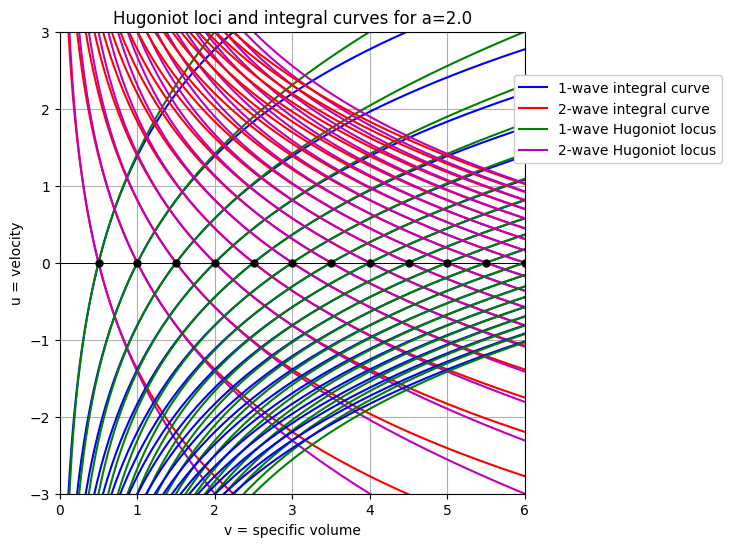

In [8]:
plot_phase_plane()

v = linspace(1e-2,10,1000)  # for plots
u0 = 0.

for k,v0 in enumerate(arange(0.5,10.1,0.5)):
    
    if k==0:
        # only label one curve of each type:
        
        # integral curves:
        plot(v, uint1(v,v0,u0,a), 'b',label='1-wave integral curve')
        plot(v, uint2(v,v0,u0,a), 'r',label='2-wave integral curve')

        # Hugoniot loci:
        plot(v,uhug1(v,v0,u0,a),'g',label='1-wave Hugoniot locus')
        plot(v,uhug2(v,v0,u0,a),'m',label='2-wave Hugoniot locus')
        
    else:
        # integral curves:
        plot(v, uint1(v,v0,u0,a), 'b')
        plot(v, uint2(v,v0,u0,a), 'r')

        # Hugoniot loci:
        plot(v,uhug1(v,v0,u0,a),'g')
        plot(v,uhug2(v,v0,u0,a),'m')
    plot([v0],[0],'ko',markersize=5)
    
legend(framealpha=1, bbox_to_anchor=(1.2, 0.7))
    
title('Hugoniot loci and integral curves for a=%.1f' % a);
#savefig('isothermal2.png', bbox_inches='tight')

**Question 5.** 

Given the physical interpretation of this system (and remembering that $q=(v,u)$),
we expect that if
$q_\ell = (1,-2)$ and $q_r = (1,2)$, then the solution to the 
Riemann problem with this data should consist of two rarefaction waves.
For the case $a=2$, determine the middle state $q_m$ for this solution. 
You should be able to solve this analytically.

Confirm that this is the physically correct solution by considering how the relevant eigenvalue varies as you move from $q_\ell$ to $q_m$ to $q_r$.

*Note:* You do not need to find the form of the rarefaction waves
$\tilde q(x/t)$ for this homework.  But you will for the next homework, so
you might want to think about this too.


#### Solution:

$q_m$ must lie on the 1-wave integral curve through $q_\ell$ and the 2-wave integral curve through $q_r$, so

\begin{align*}
u_m &= u_\ell + a\log(v_m/v_\ell)\\
u_m &= u_r - a\log(v_m/v_r)
\end{align*}  

equating these and solving for $v_m$ gives

$$
v_m = \sqrt{v_\ell v_r}~\exp(a(u_r-u_\ell)/2)
$$

and then use either expression for $u_m$.

For the left and right states given, $v_m = e$ and $u_m = 0$.

Check these:

In [9]:
vl = 1; ul = -2; 
vr = 1; ur = 2

vm = sqrt(vl*vr) * exp((ur-ul)/(2*a))
um = ul + a*log(vm/vl)
um2 = ur - a*log(vm/vr)  # alternatively
print('vm = %g' % vm)
print('um = %g or %g (these should agree)' % (um, um2))

# check that nonlinear solver gives the same result:
g = lambda v: uint1(v,vl,ul,a) - uint2(v,vr,ur,a)
vm = fsolve(g,(vl+vr)/2)
print('fsolve solution vm = %g' % vm)

# save values for comparison below:
vm_rare = vm
um_rare = um

vm = 2.71828
um = 0 or 0 (these should agree)
fsolve solution vm = 2.71828


Make the plot for Question 7:

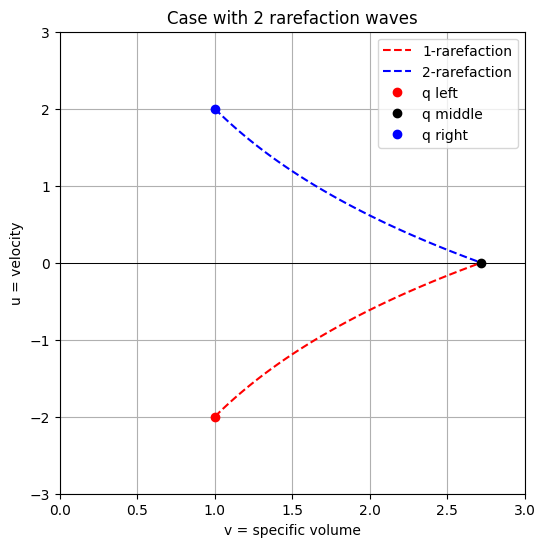

In [10]:
plot_phase_plane()
v = linspace(vl,vm,100)
plot(v, uint1(v,vl,ul,a),'r--',label='1-rarefaction')
plot(v, uint2(v,vr,ur,a),'b--',label='2-rarefaction')
plot([vl],[ul],'ro',label='q left')
plot([vm_rare],[um_rare],'ko',label='q middle')
plot([vr],[ur],'bo',label='q right')
legend()
xlim(0,3)
title('Case with 2 rarefaction waves');

**Question 6.** 

What is the two-shock Riemann solution for arbitrary $q_\ell$ and
$q_r$?  You should also be able to solve this analytically.  

*Hint:* solve a quadratic equation for $\sqrt{v_m}$.

As an example, what is the 2-shock solution for the data from the previous
part, $a=2, ~q_\ell = (1,-2)$ and $q_r = (1,2)$?

How far is this from the correct middle state from the 2-rarefaction solution?

#### Solution:

For a solution with two shock waves, we want $q_m$ to lie on the 1-wave Hugoniot locus through $q_\ell$ and the 2-wave H-locus through $q_r$, so 


\begin{align*}
u_m &= u_\ell - \frac{a}{\sqrt{v_\ell v_m}}{v_m - v_\ell}\\
u_m &= u_r + \frac{a}{\sqrt{v_r v_m}}{v_m - v_r}
\end{align*}  

equating these and solving for $v_m$ gives a quadratic equation for $z = \sqrt{v_m}$:

$$
\left(\frac{a}{z_r} + \frac{a}{z_\ell}\right) z^2
+ (u_r-u_\ell)z - a(z_r + z_\ell) = 0.
$$

The solution using the quadratic formula is implemented below and compared against the solution found with fsolve:

In [11]:
vl = 1; ul = -2;
vr = 1; ur = 2
zl = sqrt(vl); zr = sqrt(vr)
d = sqrt((ur-ul)**2 + 4*a**2*(zr+zl)*(1/zr + 1/zl))
zm = ((ul-ur) - d)/(2*a*(1/zr + 1/zl))
#zm = ((ul-ur) + d)/(2*a*(1/zr + 1/zl))  # other intersection
vm = zm**2
um = uhug1(vm,vl,ul,a)
print('2-shock approximation:  vm = %g, um = %g' % (vm,um))

# check that nonlinear solver gives the same result:
g = lambda v: uhug1(v,vl,ul,a) - uhug2(v,vr,ur,a)
vm = fsolve(g,(vl+vr)/2)
print('fsolve solution vm = %g' % vm)

vm_shock = vm
um_shock = um

2-shock approximation:  vm = 2.61803, um = 0
fsolve solution vm = 2.61803


How far is this from the correct solution with two rarefaction waves?  

$u_m$ is correct (by symmetry), but $v_m$ is off by this much:

In [12]:
print('vm_shock - vm_rare = %.3f' % (vm_shock-vm_rare))

vm_shock - vm_rare = -0.100


Make the plot for Question 7:

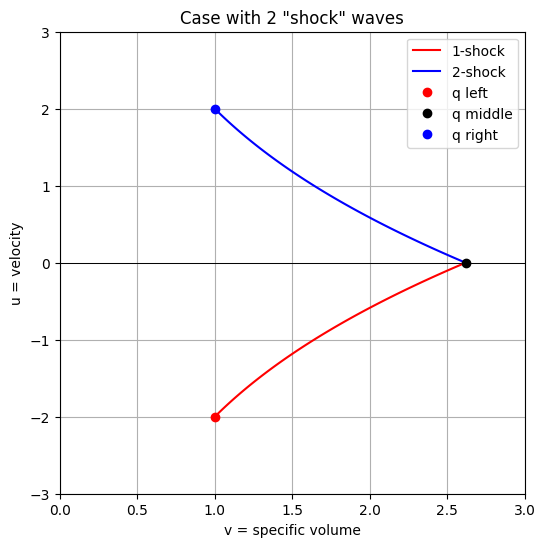

In [13]:
v = linspace(vl,vm,100)
plot_phase_plane()
plot(v, uhug1(v,vl,ul,a),'r-',label='1-shock')
plot(v, uhug2(v,vr,ur,a),'b-',label='2-shock')
plot([vl],[ul],'ro',label='q left')
plot([vm_shock],[um_shock],'ko',label='q middle')
plot([vr],[ur],'bo',label='q right')
legend()
xlim(0,3)
title('Case with 2 "shock" waves');

**Question 7.** 

Produce a phase plane plot that shows $q_\ell,~q_m,~q_r$, and the curves connecting them from the answer to Question 5, and also the Hugoniot loci from Question 6.


#### Solution:

See above for the individual plots showing $q_m$ in each case.  Below we plot both sets of curves together.

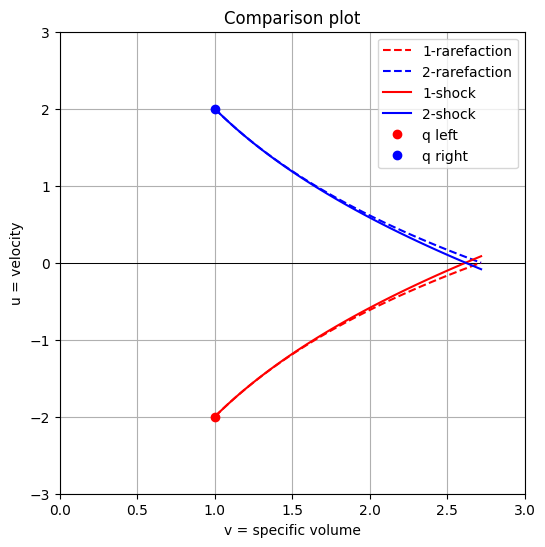

In [14]:
v = linspace(vl,vm_rare,100)

plot_phase_plane()
plot(v, uint1(v,vl,ul,a),'r--',label='1-rarefaction')
plot(v, uint2(v,vr,ur,a),'b--',label='2-rarefaction')
plot(v, uhug1(v,vl,ul,a),'r-',label='1-shock')
plot(v, uhug2(v,vr,ur,a),'b-',label='2-shock')
plot([vl],[ul],'ro',label='q left')
plot([vr],[ur],'bo',label='q right')
legend()
xlim(0,3)
title('Comparison plot');